This jupyter notebook provides the code stumps for the exam questions.

## Question 1: Profit Optimization for Hotel Room Sales

In [10]:
price = [50, 40, 30]

In [1]:
#demandfunction D(p)

def demand(p): 
    return (1000-2.2*p,0)
    

In [2]:
# Revenue function 
def revenue(p):
    d = demand(d)
    return p * d

In [12]:
#Total cost function 
def total_cost(p): 
    d = demand(d)
    cost = 0 
    fee = 0
    if d <= 60: 
        cost = 50 * d 
    elif d<=150: 
        cost = (d-60)*40 + 50*60
    elif d>150:
        cost = (d-150)*30 + 50*60 + 40*(150-60)
    elif d>200: #only 200 rooms 
        cost = 0 
    if d> 100: 
        fee = 20000
    else: 
        fee = 0
    return cost + fee

In [11]:
#Profit function 
def profit(p): 
        return revenue(p)-total_cost(p) 


This is another attempt: 

In [21]:
prices = [50, 40, 30]
demands = [60, 90, 150]

def demand(p): 
    for p in (prices): 
        return (1000-2.2*p,0)

demand = demand(prices)
demand

(890.0, 0)

In [7]:
prices = [50, 40, 30]
demand = [60, 90, 150]

def revenue (p,d):
    revenue = 0  
    for p,d in zip(prices, demand): 
        revenue = revenue + p*d
    return revenue

revenue = revenue(prices, demand)
revenue

11100

## Question 2: Hotel Reservation Management

In [17]:
hotel = [{'rooms_available': 40},
            {'adr_threshold':  20},
            {'bookings':  70},
            ]

reservation = [{'rooms': 10},
            {'adr':  30},
            {'id':  50},
            ]

hotel

[{'rooms_acailable': 40}, {'adr_threshold': 20}, {'bookings': 70}]

In [145]:
def process_reservation(hotel, reservation):
    rooms_ava = hotel["rooms_available"]
    adr_thres = hotel["adr_threshold"]
    room_res = reservation["rooms"]
    adr_res = reservation["adr"]
    
    bookings = hotel["bookings"]
    if adr_res>=adr_thres:
         if rooms_ava>=adr_res: 
            bookings.append(reservation) #should accept booking 
            rooms_ava =  rooms_ava-room_res #update rooms avaliable with the booking
    return hotel  



In [146]:
hotel_1 = process_reservation(hotel, reservation)
hotel_1

TypeError: list indices must be integers or slices, not str

In [147]:
def process_reservations(hotel, reservation):
    for reservations in reservation: 
        hotel = process_reservation(hotel, reservation)
        return hotel

In [148]:
hotel_2 = process_reservations(hotel, reservation)
hotel_2

TypeError: list indices must be integers or slices, not str

## Question 3

The dataset is provided in the `data.csv` file.

In [27]:
import pandas as pd

In [29]:
df = pd.read_csv("data.csv", sep = ",")

In [30]:
df.head()

,date,adr,room_type,num_rooms,location,month
0,2023-01-01,157,single,3,Copenhagen,1
1,2023-01-01,474,suite,1,Copenhagen,1
2,2023-01-01,442,suite,1,New York,1
3,2023-01-01,141,single,3,Copenhagen,1
4,2023-01-01,200,single,3,New York,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       7300 non-null   object
 1   adr        7300 non-null   int64 
 2   room_type  7300 non-null   object
 3   num_rooms  7300 non-null   int64 
 4   location   7300 non-null   object
 5   month      7300 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 342.3+ KB


In [36]:
print(df.dtypes)

date         object
adr           int64
room_type    object
num_rooms     int64
location     object
month         int64
dtype: object


In [32]:
df.describe()

,adr,num_rooms,month
count,7300.000000,7300.000000,7300.000000
mean,240.867945,2.996575,6.526027
std,119.865884,1.415613,3.448088
min,44.000000,1.000000,1.000000
25%,148.000000,2.000000,4.000000
50%,222.000000,3.000000,7.000000
75%,310.000000,4.000000,10.000000
max,716.000000,5.000000,12.000000


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#Distribution of different room types and locations 
df.columns

Index(['date', 'adr', 'room_type', 'num_rooms', 'location', 'month'], dtype='object')

In [39]:
df[["location","room_type"]]

,location,room_type
0,Copenhagen,single
1,Copenhagen,suite
2,New York,suite
3,Copenhagen,single
4,New York,single
...,...,...
7295,New York,single
7296,New York,single
7297,New York,single
7298,Copenhagen,double


In [41]:
df["room_type"].unique()

array(['single', 'suite', 'double'], dtype=object)

In [42]:
df["location"].unique()

array(['Copenhagen', 'New York', 'Berlin'], dtype=object)

In [47]:
#creating numerical values for the categorical columns 
city = {"Copenhagen" : 1, "Berlin" : 2, "New York" : 3}
room = {"single" : 1, "suite" : 2, "double" : 3}

df["city_num"] = df["location"].map(city)
df["room_num"] = df["room_type"].map(room)
df.head()

,date,adr,room_type,num_rooms,location,month,city_num,room_num
0,2023-01-01,157,single,3,Copenhagen,1,1,1
1,2023-01-01,474,suite,1,Copenhagen,1,1,2
2,2023-01-01,442,suite,1,New York,1,3,2
3,2023-01-01,141,single,3,Copenhagen,1,1,1
4,2023-01-01,200,single,3,New York,1,3,1


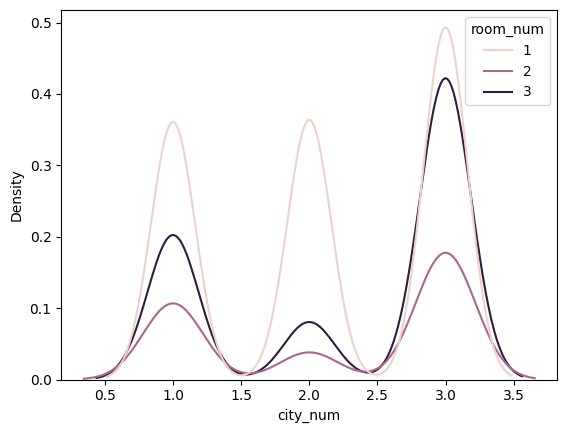

In [48]:
sns.kdeplot(x = 'city_num', hue = "room_num", data = df);

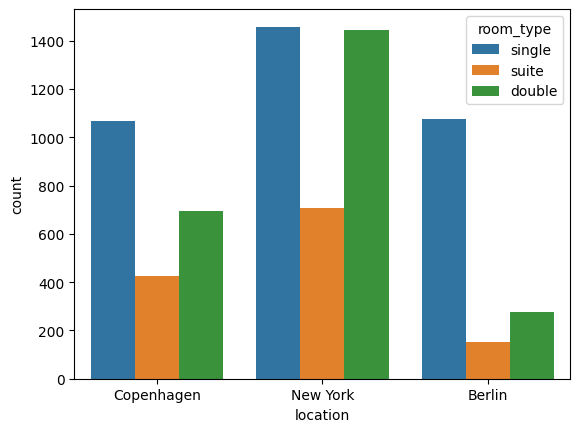

In [49]:
sns.countplot(x = 'location', hue = 'room_type', data = df);

In [50]:
df.head()

,date,adr,room_type,num_rooms,location,month,city_num,room_num
0,2023-01-01,157,single,3,Copenhagen,1,1,1
1,2023-01-01,474,suite,1,Copenhagen,1,1,2
2,2023-01-01,442,suite,1,New York,1,3,2
3,2023-01-01,141,single,3,Copenhagen,1,1,1
4,2023-01-01,200,single,3,New York,1,3,1


In [52]:
#Create date columns 
df[['year', 'month', 'day']] = df['date'].str.split('-', expand=True)
df.head()

,date,adr,room_type,num_rooms,location,month,city_num,room_num,year,day
0,2023-01-01,157,single,3,Copenhagen,01,1,1,2023,01
1,2023-01-01,474,suite,1,Copenhagen,01,1,2,2023,01
2,2023-01-01,442,suite,1,New York,01,3,2,2023,01
3,2023-01-01,141,single,3,Copenhagen,01,1,1,2023,01
4,2023-01-01,200,single,3,New York,01,3,1,2023,01


In [55]:
df["year"].unique

<bound method Series.unique of 0       2023
1       2023
2       2023
3       2023
4       2023
        ... 
7295    2023
7296    2023
7297    2023
7298    2023
7299    2023
Name: year, Length: 7300, dtype: object>

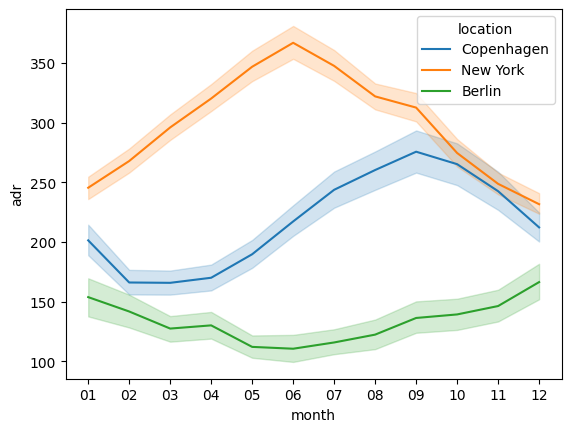

In [56]:
#adr over time 
sns.lineplot(x = 'month', y= 'adr', hue ='location', data = df);

In [67]:
#Group data 
df.groupby(["location", "room_type"])["adr"].agg(['min','mean','max'])

min        mean  max
location   room_type                      
Berlin     double      87  169.601449  282
           single      44  100.313488  172
           suite      173  305.447368  458
Copenhagen double     115  222.253968  374
           single      76  152.466229  246
           suite      202  376.708920  619
New York   double     161  303.606228  479
           single     122  225.054870  356
           suite      244  442.018336  716

In [72]:
sum_adr = df.groupby(["location", "room_type"])["adr"].sum().reset_index(name="sum_adr")
sum_adr

,location,room_type,sum_adr
0,Berlin,double,46810
1,Berlin,single,107837
2,Berlin,suite,46428
3,Copenhagen,double,154022
4,Copenhagen,single,162529
5,Copenhagen,suite,160478
6,New York,double,438711
7,New York,single,328130
8,New York,suite,313391


In [74]:
df["sum_adr"]= sum_adr["sum_adr"]
df.head()

,date,adr,room_type,num_rooms,location,month,city_num,room_num,year,day,sum_adr
0,2023-01-01,157,single,3,Copenhagen,01,1,1,2023,01,46810.0
1,2023-01-01,474,suite,1,Copenhagen,01,1,2,2023,01,107837.0
2,2023-01-01,442,suite,1,New York,01,3,2,2023,01,46428.0
3,2023-01-01,141,single,3,Copenhagen,01,1,1,2023,01,154022.0
4,2023-01-01,200,single,3,New York,01,3,1,2023,01,162529.0


In [84]:
choice = {'location': "Berlin", 'room_type': "single", 'adr': 40}
#Demand funtion 
def demand(choice, df): 
    location = df["location"]
    adr = df["adr"]
    room_type = df["room_type"]

    total_number_of_rooms = {}

    for i in df: 
        room_type = i['room_type']
        adr = i["adr"]
        location = i["location"]
        if i in choice.keys():
            total_number_of_rooms['room_type'].append(i)
        else: 
            total_number_of_rooms[room_type] = []

        return total_number_of_rooms == total_number_of_rooms.count() 



In [116]:

choices = {'location': "Berlin", 'room_type': "single", 'adr': 40}
print(list(filter(lambda choice : "location" == df["location"] and "room_type" == df["room_type"] and "adr" == df["adr"], choice )))



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [130]:
def demand(location, adr, room_type):
    filter_df = df[(df["location"]==location) and 
                   (df["room_type"]==room_type) and 
                   (df["adr"]>=adr)]
    total_number = filter_df("num_rows").sum()
    return total_number


In [137]:
adr_range = np.arange(50, 601, 50)
adr_range

demand_data = []

for adr in adr_range: 
    for location in df["location"].unique():
        for location in df["room_type"].unique():
            demand_data.append({"location": location,
                                "room_type": room_type})
df_demand = pd.DataFrame(demand_data)      
df_demand.head()      


NameError: name 'room_type' is not defined

In [ ]:
#If i could get the data to run I would plot using this command

sns.lineplot(data = df.demand)

## Question 4

The code for this question is not meant to be run and is therefore only included as an image.

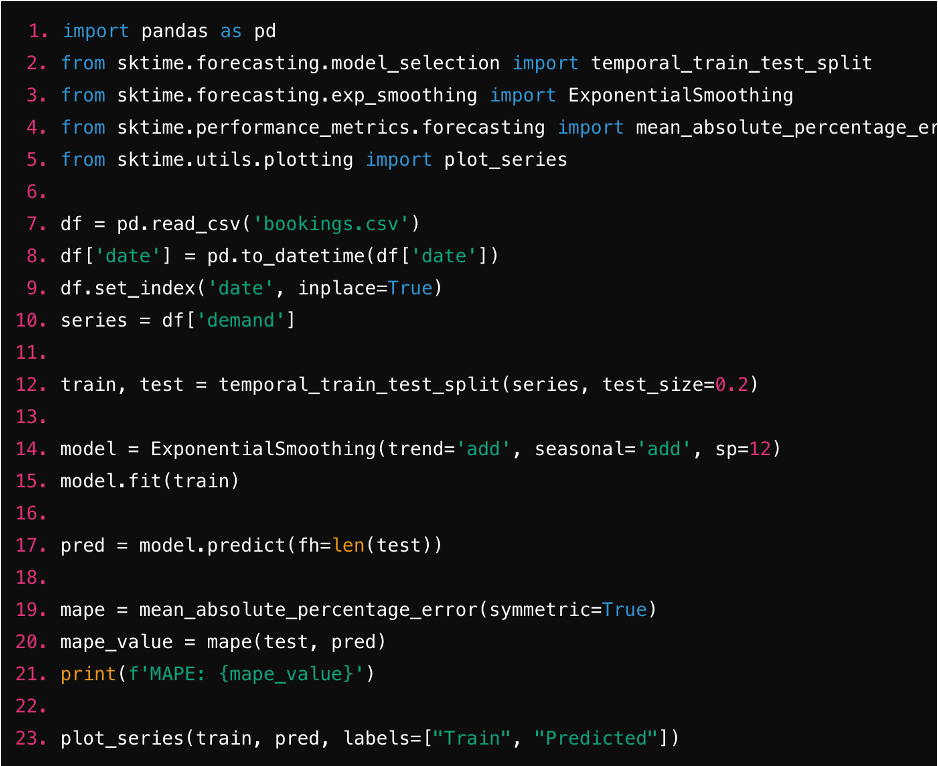

Line 9: df.set_index('date', inplace=True)
- In this line we are creating an index for the date. The line before specifies that we have a date column, and in line 9, we organise the date using an index, such that the rows takes the values (0,1,2,..). The inplace=True is used to insert the index directly into the current dataframe. Hence, this line is a way to organise the data, b given the specific date a "new name" using numbers. 

Line 12: 
- In this line we are splitting the data into training and testing sets. This is used when running machine learning models and somethimes also time series models. The idea is that we want to train the model on the training set and then validate on the test set. In this specific case, we use this code for time series, and here it is crucial that we keep the order of observations in order to preserve the time information of a varibale. Therefore we use the temporal train split, and not a random split. We are splitting the data "series", and using 80% of the data for training and 20% for testing, which is specififed by test_size = 0.2. 

line 14: 
- In this case we are specifying the model using the exponential smoothing model, which is a time series model that assumes that the future will be in line as the recent past. In this code we specify that we will add a trend and seasonal component, and that season varys over 12 periods. 

line 15: 
- In this line we are fitting the specified model from line 14 to the training data. 

Line 17: 
- In this Line we are predicting the fitted model, meaning that we are using the model, to try to predict the demand, using test data, and specifying the forcasting horizon to the length of the test data. 

Line 19+20
- In these lines we try to calculate the mean absolute percentage errors, which means that we want to see how well our model performs. This means that we compare the predicted data with our test data, and perfrom a "validation" test for our model. In this case we want the predicted values to be as similar as the data in the test data. 

Line 23 
- Lastly we are plotting our results, by plotting both the predicted data and the test data. In this way we can identify visually how our model has predicted and performed. 

The limitations of this choice of model is that the forecasts lag behind the actual data, and there is no ability to adjust for trend or seasonality. Furthermore the choice of smoothing parameter is arbitrary chosen. In order to account for the lack of incorporating a trend one can use double exponential smoothing instead. 

Based on the model specification, given as F_t+1 = aD_t + (1-a)F_t, the model does not account for external features. It's a "simple" model, which predicts the target value based on previous values of itself. Hence, depending on the smooting parameter, it adds more weigth on recent observations. Furthermore both features mentioned are binary variables. 

If we wanted to incoorporate other features in order to predict the model, one alternative approach is to use linear regression or some machine learning models such as random forrest or boosting models. As an example we can use the random forrest regressor, where we will  need the following package and code:
from sklearn.ensemble import RandomForestRegressor





In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


y = df["demand"]
features = df[["special_events", "holiday_flag"]]
#hboth vairbales are binary 

numerical_transformer = SimpleImputer(strategy='median') #using simple imputation for numerical missing values. Hence the demand

# Preprocessing categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
]) #Here we use one-hot-encoder to transform categorical values. Firstly we impute using the most frequent, and then using the binary 1/0 encoder. 
#As the two features already are binary, we do not necesarily have to incoperate this step into the model. However if we had we could use this. 

# Bundle both preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, low_cardinality_cols)
]) #Here we combine the two transformer into one preprocer. 


#Code for alternative model: 
model_rf = RandomForestRegressor(random_state=1, n_estimators=350, max_features="log2") #the model

# Bundle preprocessing and modeling code in a pipeline, assuming we have predefined a preprocessor handling missing values. 
complete_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_rf)
])
#Otherwise we can skip above and go down to the fitting of the model

# Preprocess the raw training data and fit the model
complete_pipeline_rf.fit(X_train, y_train) #here X_train and Y_train is our training data 

preds = complete_pipeline_rf.predict(X_valid) #we are predicting using our validation set. 

# Lastly evaluating the model using the validation set
score = mean_absolute_error(y_valid, preds)
print("MAE using the complete random forest pipeline: {}".format(score))

## Question 5

In [92]:
try:
  from pulp import *
except:
  !pip install pulp
  from pulp import *

import numpy as np


# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 50 # Total resource capacity (e.g., hours available from specialists)

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

#decision variable
price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

#objective function 
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))


1

In this code a spa want to optimize its revenue, by determine the best price levels. 
The demand function is taking each types of treatment and assigning each price level in price_range and caluclates the demand. Then it calculates each demand for each treatment and price, and this line demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0) tells ushow demand changes with the price. Specifically, the demand looks like it is decreasing when price goes up.

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

The price range is [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]


The **objective function** is given as: 
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

It takes each of the treatment and price combinations and times it with the demand of the specific combination. It then want to maximize this prblem. 

The **decision variable** is given by 
price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')
It is a binary variable, meaning that either one chooses the treatment at the specific price, or not. 


There are two **constraints**:
# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

The first constraints tells us that the total sum of each treatment over all prices needs to sum to 1. 

Constraint number two tells us that the specific treatment and cost of this treatment should be below the treatment resources and its costs. 

In [93]:
# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 30 

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

#decision variable
price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

#objective function 
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))



1

In [99]:
if prob.status == pulp.LpStatusOptimal:
    print("Optimal Prices:")
    for j in treatments:
        print(f"  {j}: ${price_vars[j].varValue:.2f}")

print(f"\nTotal Revenue: ${pulp.value(prob.objective):.2f}")

AttributeError: module 'pulp.pulp' has no attribute 'LpStatusOptimal'

In [110]:
resource_levels = price_range = np.arange(20, 101, 10)
resource_levels

data = []

In [114]:
# Example data
treatments = ['Basic Massage', 'Aromatherapy', 'Deep Tissue Massage']
price_range = np.arange(10, 101, 10)  # Pricing levels
a_values = {'Basic Massage': 1500, 'Aromatherapy': 2000, 'Deep Tissue Massage': 1600}
b_values = {'Basic Massage': 1.5, 'Aromatherapy': 1.2, 'Deep Tissue Massage': 1.3}
resource_usage_per_unit = {'Basic Massage': 1, 'Aromatherapy': 2, 'Deep Tissue Massage': 3}
total_resource_capacity = 30 

demand = {}
for treatment in treatments:
    demand[treatment] = {}
    for p in price_range:
        demand[treatment][p] = max(a_values[treatment] * p**(-b_values[treatment]), 0)

prob = LpProblem("Spa_Treatment_Profit_Maximization", LpMaximize)

#decision variable
price_vars = {}
for treatment in treatments:
  price_vars[treatment] = LpVariable.dicts(treatment+"price", price_range, cat='Binary')

#objective function 
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * price for treatment in treatments for price in price_range)

# Constraint Block 1
for treatment in treatments:
    prob += lpSum(price_vars[treatment][price] for price in price_range) == 1

# Constraint Block 2
prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= total_resource_capacity

# Solve the problem
prob.solve(PULP_CBC_CMD(msg=False))

for modifier in resource_levels:
    for t in treatment:
        prob += lpSum(price_vars[treatment][price] * demand[treatment][price] * resource_usage_per_unit[treatment]
                   for treatment in treatments for price in price_range) <= modifier
    prob.solve(PULP_CBC_CMD(msg=0))
    if prob.status == -1:
        break
    else:
        data.append({"modifier" : modifier, "profit" : prob.objective.value(), "status" : prob.status})


In [108]:
LetsPlot.setup_html()

In [115]:
data = pd.DataFrame(data)
ggplot(data) + geom_line(aes(x="modifier", y="profit"))

#That looks very bad :((((